In [126]:
import os
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [101]:
data_folder = "data"
submissions_folder = os.path.join(data_folder, "submissions") 

train_file = os.path.join(data_folder, "train.csv")
test_file = os.path.join(data_folder, "test.csv")

In [102]:
train_df = pd.read_csv(train_file)

In [103]:
df = train_df.drop(columns=["id", "keyword", "location"])

In [104]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [105]:
df.loc[:, "text"] = df.text.astype("string")
df.loc[:, "original"] = df.text

#### Check len of each tweet

In [106]:
df.loc[:, "pre_clean_len"] = df.text.str.len()

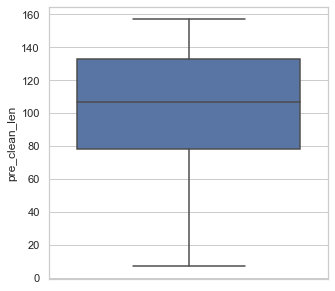

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df, y="pre_clean_len", ax=ax)

### Data Cleaning
#### HTML decoding

In [108]:
df.iloc[62].text

'Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z'

In [109]:
ex = BeautifulSoup(df.text[62], 'lxml')
example1.get_text()

'Rene Ablaze & Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z'

#### Remove mentions (@username)

In [110]:
df.iloc[36].text

"@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."

In [111]:
re.sub(r'@[A-Za-z0-9]+','', df.text[36])

" #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."

#### Remove urls

In [112]:
df.text[31]

'@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C'

In [113]:
re.sub('https?://[A-Za-z0-9./]+', '', df.text[31])

'@bbcmtd Wholesale Markets ablaze '

In [114]:
def html_cleaning(text):
    # Clean html encoding
    text = BeautifulSoup(text, 'lxml').get_text()
    return text

In [115]:
text_cleaning(df.iloc[62].text)

'Rene Ablaze & Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z'

In [116]:
df.text.str.replace(r'@[A-Za-z0-9]+', '').iloc[31]

' Wholesale Markets ablaze http://t.co/lHYXEOHY6C'

In [117]:
df.iloc[31].text

'@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C'

In [118]:
df.iloc[0].text

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [119]:
df.text.str.replace('[^a-zA-Z]', ' ').iloc[0]

'Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all'

<b>Usuful new Pandas string features</b>

In [150]:
def html_cleaning(text):
    # Clean html encoding
    text = BeautifulSoup(text, 'lxml').get_text()
    return text

df.loc[:, "text"] = df.text.apply(html_cleaning)

# Remove mentions
df.loc[:, "text"] = df.text.str.replace(r'@[A-Za-z0-9]+', '')

# Remove urls
df.loc[:, "text"] = df.text.str.replace('https?://[A-Za-z0-9./]+', '')

# Get only letters
df.loc[:, "text"] = df.text.str.replace('[^a-zA-Z]', ' ')

# Remove extra spaces
df.loc[:, "text"] = df.text.str.replace(' +', ' ')

In [151]:
df.loc[:, "clean_len"] = df.text.str.len()

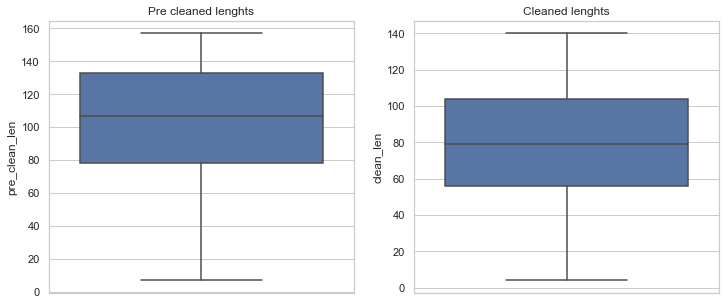

In [152]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(data=df, y="pre_clean_len", ax=ax1)
sns.boxplot(data=df, y="clean_len", ax=ax2)

_ = ax1.set_title("Pre cleaned lenghts")
_ = ax2.set_title("Cleaned lenghts")

In [178]:
stop_words = stopwords.words('english')
def generate_word_cloud(texts, title, stop_words=stop_words):
    words = [word.lower() for text in texts for word in text if word not in stop_words]
    frequences_dict = pd.Series(words).value_counts().to_dict()
    
    wordcloud = WordCloud().generate_from_frequencies(frequences_dict)

    fig = plt.subplots(figsize=(20, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=32)
    plt.show()

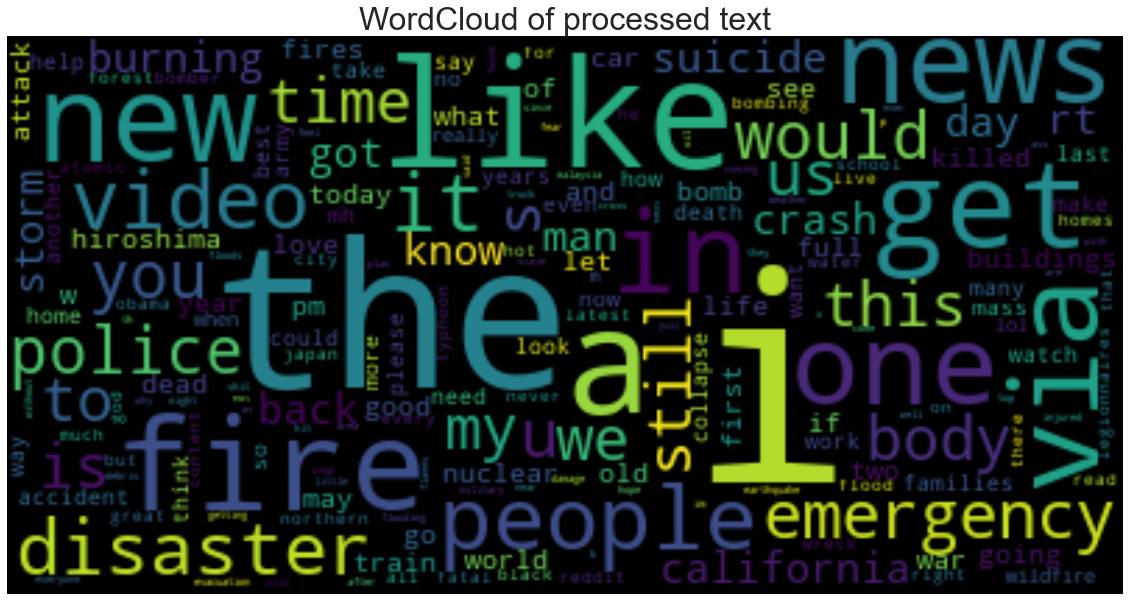

In [179]:
splited = df.text.str.split(" ").tolist()
generate_word_cloud(splited, "WordCloud of processed text")

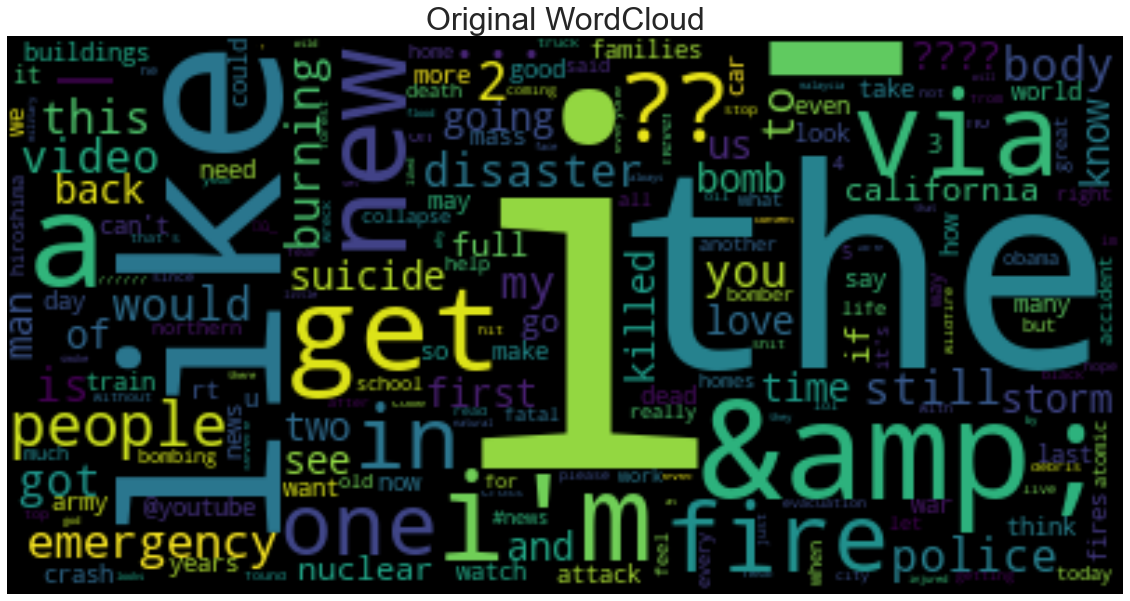

In [181]:
splited = df.original.str.split(" ").tolist()
generate_word_cloud(splited, "Original WordCloud")

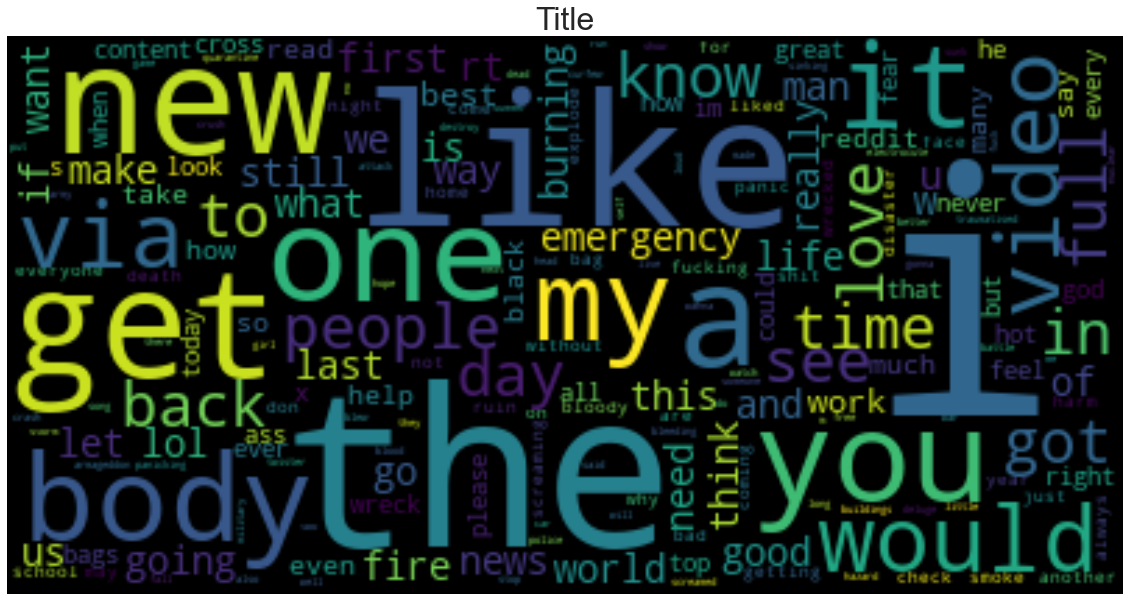

In [182]:
splited = df[df.target == 0].text.str.split(" ").tolist()
generate_word_cloud(splited, "Title")

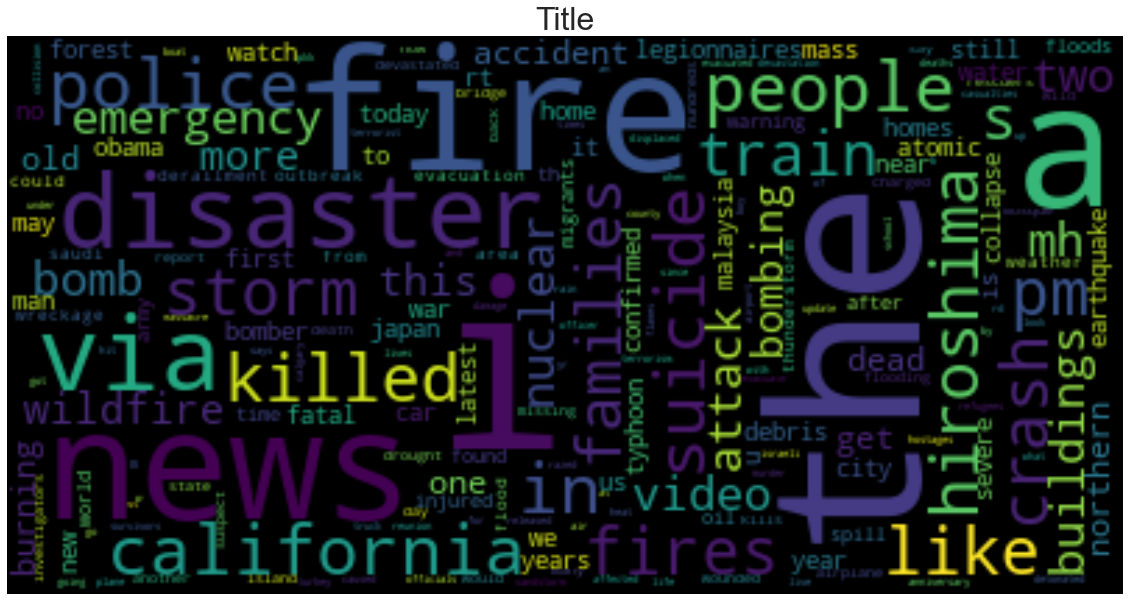

In [183]:
splited = df[df.target == 1].text.str.split(" ").tolist()
generate_word_cloud(splited, "Title")